# Titanic: Machine Learning from Disaster

-> Competition Description
   The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her      maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This    sensational tragedy shocked the international community and led to better safety regulations for ships.

   One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the        passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of        people were more likely to survive than others, such as women, children, and the upper-class.

   In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In              particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In [26]:
import pandas as pd   # for csv fn
import numpy as np    # matrics 
import seaborn as sns
import matplotlib.pyplot as plt   
import math

titanic_data= pd.read_csv("train.csv")


In [27]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
titanic_data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [29]:
print("Total number of passengers: "+str(len(titanic_data.index)))

Total number of passengers: 891


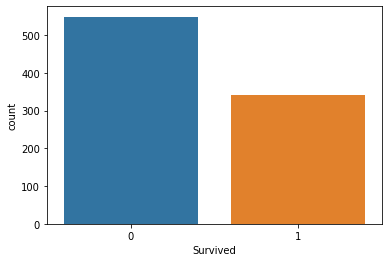

In [30]:
sns.countplot(x="Survived", data= titanic_data)

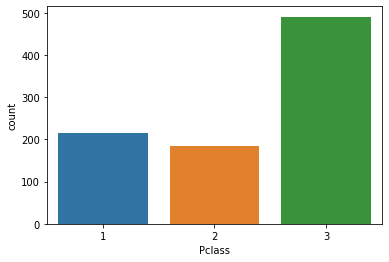

In [31]:
sns.countplot(x="Pclass", data= titanic_data)  #histogram plot

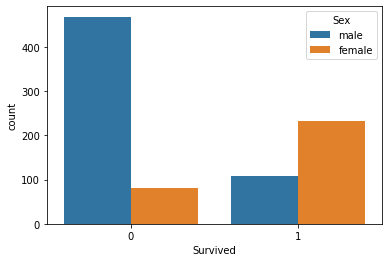

In [32]:
sns.countplot(x="Survived",hue="Sex", data= titanic_data)

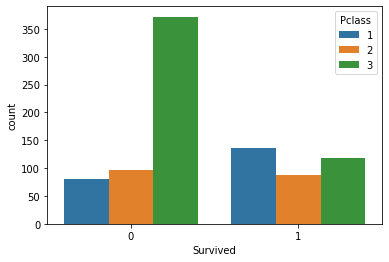

In [33]:
sns.countplot(x="Survived",hue="Pclass", data= titanic_data)

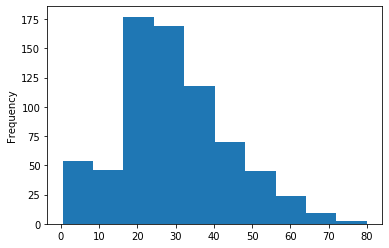

In [34]:
titanic_data["Age"].plot.hist()

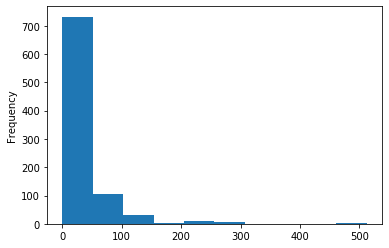

In [35]:
titanic_data["Fare"].plot.hist()

AttributeError: 'Rectangle' object has no property 'bin'

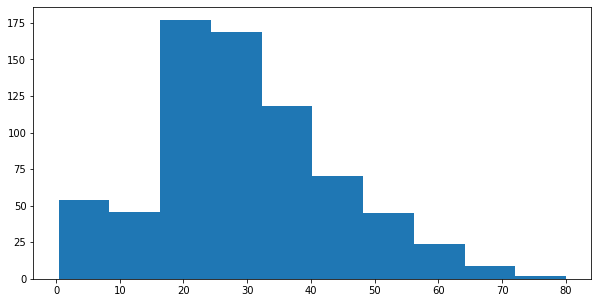

In [36]:
titanic_data["Age"].plot.hist(bin=20,figsize=(10,5))

In [37]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


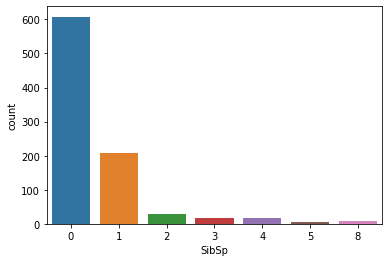

In [38]:
sns.countplot(x="SibSp", data= titanic_data)

# Data Cleaning ( Wrangling)

In [39]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [40]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

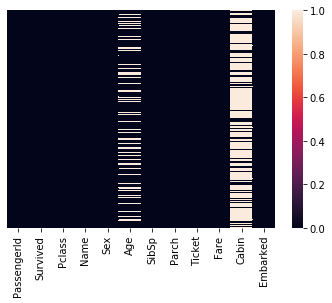

In [41]:
sns.heatmap(titanic_data.isnull(),yticklabels=False)

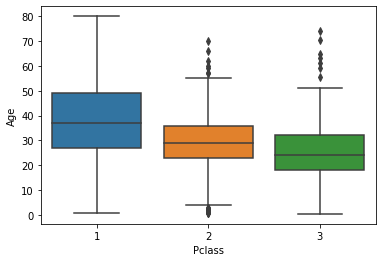

In [42]:
sns.boxplot(x="Pclass", y="Age", data= titanic_data)

In [43]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
titanic_data.drop("Cabin", axis=1, inplace=True)

In [45]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


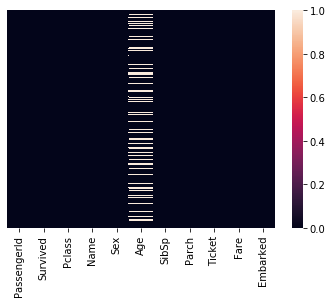

In [46]:
sns.heatmap(titanic_data.isnull(),yticklabels=False)

In [47]:
titanic_data.dropna(inplace=True)

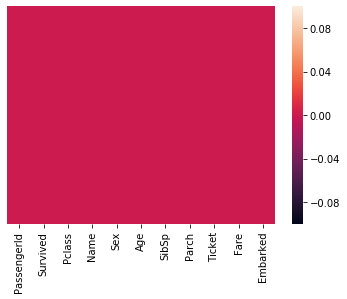

In [48]:
sns.heatmap(titanic_data.isnull(),yticklabels=False)

In [49]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [50]:
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True) #we only need one column
sex.head(10)

,male
0,1
1,0
2,0
3,0
4,1
6,1
7,1
8,0
9,0
10,0


In [51]:
embark=pd.get_dummies(titanic_data['Embarked']) 
embark.head(10)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0
10,0,0,1


In [52]:
embark=pd.get_dummies(titanic_data['Embarked'],drop_first=True) 
embark.head(10)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
6,0,1
7,0,1
8,0,1
9,0,0
10,0,1


In [53]:
pclass=pd.get_dummies(titanic_data['Pclass'],drop_first=True) 
pclass.head(10)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
6,0,0
7,0,1
8,0,1
9,1,0
10,0,1


In [54]:
titanic_data=pd.concat([titanic_data,sex,embark,pclass],axis=1)

In [55]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,0,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,1,0,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,0,1,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,0,0,1,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,0,0,1,0,1


In [56]:
titanic_data.drop(['Pclass'],axis=1,inplace=True)

In [57]:
titanic_data.head(10)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1
6,7,0,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,0,1,0,0
7,8,0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,1,0,1,0,1
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,0,1,0,1
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,0,0,1,0
10,11,1,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,0,0,1,0,1


# Train Data

In [58]:
x= titanic_data.drop("Survived", axis=1) #indipendent variables
y= titanic_data["Survived"] # depedent variables

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=1) #split data in test and train 70% train

# Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
logmodel= LogisticRegression()

In [63]:
logmodel.fit(x_train, y_train)

C:\Users\Purnima\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'S'

In [64]:
predictions= logmodel.predict(x_test)

NotFittedError: This LogisticRegression instance is not fitted yet

In [65]:
from sklearn.metrics import classification_report

In [66]:
classification_report(y_test, predictions)

NameError: name 'predictions' is not defined

# Prediction

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy_score(y_test,predictions)

NameError: name 'predictions' is not defined